In [1]:
import pandas as pd
import random as rnd
import numpy as np
import math
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
fortune_list = pd.read_csv("fortune.csv")#read csv file

In [3]:
fortune_list.head(7)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468


In [4]:
fortune_list.shape #giving how many row and col information

(1000, 18)

In [5]:
fortune_list.info()# it's giving attributes' type info and how many value is non null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [6]:
fortune_list.sample(5)#chosing 5 random obje from my data 

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
312,Peter Kiewit Sons',313,-70.0,12149.0,753.0,28800.0,Engineering & Construction,Omaha,NE,no,no,no,yes,243.0,Rick Lanoha,https://www.kiewit.com,NaN,NaN
672,Century Communities,673,0.0,4216.3,498.5,1600.0,Engineering & Construction,Greenwood Village,CO,no,yes,no,yes,,Dale Francescon/Robert Francescon,https://www.centurycommunities.com,CCS,1388
908,Steelcase,909,0.0,2596.2,26.1,11400.0,Household Products,Grand Rapids,MI,no,no,yes,yes,,Sara E. Armbruster,https://www.steelcase.com,SCS,1339.5
972,Clear Channel Outdoor Holdings,973,0.0,2241.1,-433.8,4600.0,Business Services,San Antonio,TX,no,no,no,no,,Scott R. Wells,https://www.clearchanneloutdoor.com,CCO,1630.9
150,Paccar,151,8.0,23522.3,1852.1,28500.0,Motor Vehicles & Parts,Bellevue,WA,no,no,no,yes,159.0,R. Preston Feight,https://www.paccar.com,PCAR,29101


In [7]:
fortune_list.describe() 

,rank,rank_change,revenue,profit,num. of employees
count,1000.000000,1000.000000,1000.000000,997.000000,9.990000e+02
mean,500.497000,-0.701000,17986.801400,2026.476329,3.578867e+04
std,288.818067,31.818674,40813.281554,6421.578081,1.046546e+05
min,1.000000,-178.000000,2107.200000,-6520.000000,1.600000e+02
25%,250.750000,-3.000000,3500.750000,195.400000,6.500000e+03
50%,500.500000,0.000000,6375.500000,572.000000,1.353000e+04
75%,750.250000,0.000000,14615.475000,1498.300000,2.890000e+04
max,1000.000000,295.000000,572754.000000,94680.000000,2.300000e+06


In [8]:
fortune_list.dtypes


company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees    float64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank             object
CEO                   object
Website               object
Ticker                object
Market Cap            object
dtype: object

<AxesSubplot:>

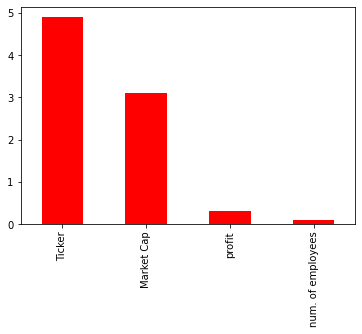

In [9]:
null =fortune_list.isna().sum().sort_values(ascending = False)/len(fortune_list)*100
null[null != 0].plot(kind='bar', color='red') 

In [10]:
missingPercentages = fortune_list.isna().sum().sort_values(ascending = False)/len(fortune_list)*100
print(missingPercentages) #it shows percentages of missing values

Ticker               4.9
Market Cap           3.1
profit               0.3
num. of employees    0.1
ceo_founder          0.0
Website              0.0
CEO                  0.0
prev_rank            0.0
profitable           0.0
ceo_woman            0.0
company              0.0
rank                 0.0
state                0.0
city                 0.0
sector               0.0
revenue              0.0
rank_change          0.0
newcomer             0.0
dtype: float64


<AxesSubplot:ylabel='Frequency'>

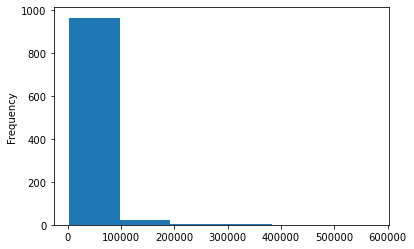

In [11]:
fortune_list['revenue'].plot(kind='hist',bins=6) #shows frequency of data points  within a specific range of revenue values.

<AxesSubplot:ylabel='ceo_woman'>

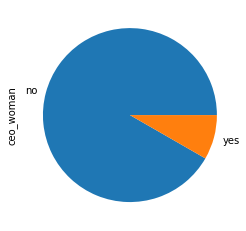

In [12]:
fortune_list['ceo_woman'].value_counts().plot.pie()

<AxesSubplot:xlabel='revenue', ylabel='Count'>

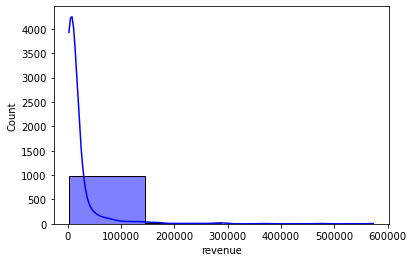

In [13]:
sns.histplot(fortune_list, x='revenue', kde=True,bins=4, color="b")

In [14]:

temp = pd.DataFrame()
#dataları 
temp['profit'] = fortune_list['profit'].copy()
temp['revenue'] = fortune_list['revenue'].copy()


temp['profit'] = temp.groupby("revenue").transform(lambda x: x.fillna(x.mean()))

fortune_list['profit'] = temp['profit'].copy()  #degerleri  gruplayp  ortalamaasını alıp eksik degerlere ekliyoruz

In [15]:

ifit = fortune_list['profit'] == fortune_list.loc[40, 'profit']

ortalama = fortune_list[ifit]['profit'].mean()

print(" örneğin alması gereken profit değeri:", ortalama)
print('örneğin kayıp değeri doldurulduktan sonra aldığı değer:', fortune_list.loc[40]['profit'])

 örneğin alması gereken profit değeri: 21548.0
örneğin kayıp değeri doldurulduktan sonra aldığı değer: 21548.0


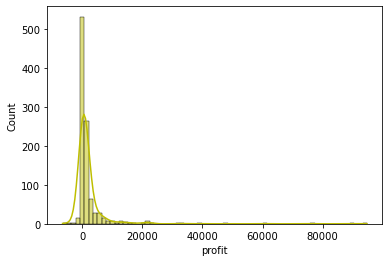

In [16]:
sns.histplot(fortune_list, x='profit',bins=70, kde=True, color="y") 
mean=fortune_list['profit'].mean()
median=fortune_list['profit'].median()

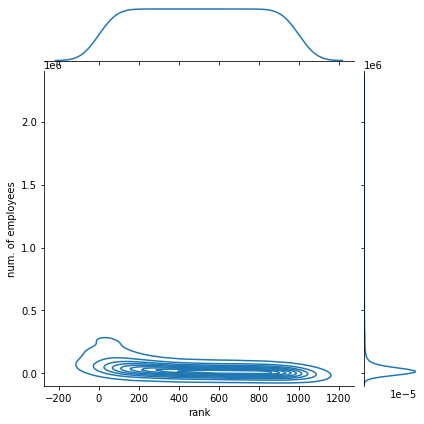

In [17]:

sns.jointplot(x ='rank', y ='num. of employees', data = fortune_list, kind ='kde') 
#grafiğin farklı bölgelerinde veri noktalarının yoğunluğu hakkında bilgi vrmesi icin grafik egilimlerini kullandım.


<AxesSubplot:xlabel='num. of employees', ylabel='Count'>

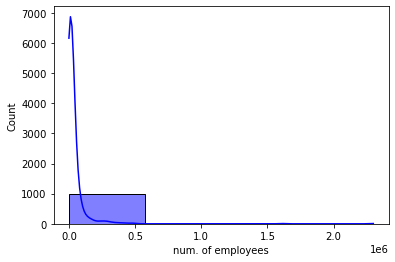

In [18]:
sns.histplot(fortune_list, x='num. of employees',bins=4, kde=True, color="b") #yogunluk tahmini ekleyerek ve bins ile histogramda
#bolme sayısını ayarladım ve görselde gösterdim

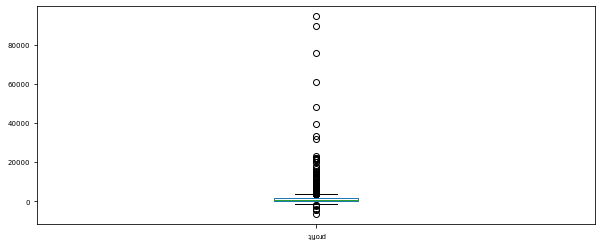

In [19]:
boxplot = fortune_list.boxplot(column=['profit'],figsize = (10,4), rot = 180, fontsize= '7', grid = False)

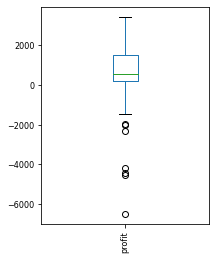

In [20]:

profit= fortune_list['profit'].quantile([0.25, 0.5, 0.75])
a=profit[0.75]+(1.5*(profit[0.75] - profit[0.25]))
fortune_list_copy = fortune_list.copy()
fortune_list_copy['profit'] = np.where(
    (fortune_list_copy['profit'] > a),
    a,
    fortune_list_copy['profit']
    )
boxplot =fortune_list_copy.boxplot(column=['profit'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

#1.5ceyrekliklerin dısında kalan kısımlar haricinde kalanlardan buyuk olanları silcek 

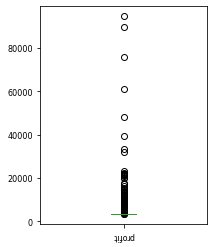

In [21]:
profit= fortune_list['profit'].quantile([0.25, 0.5, 0.75])
a=profit[0.75]+(1.5*(profit[0.75] - profit[0.25]))
fortune_list_copy = fortune_list.copy()

fortune_list_copy['profit'] = np.where(
     fortune_list_copy['profit'] < a,
    a,
       fortune_list_copy['profit']
    )
boxplot = fortune_list_copy.boxplot(column=['profit'],figsize = (3,4), rot = 180, fontsize= '8', grid = False)

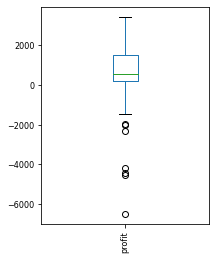

In [22]:
profit= fortune_list['profit'].quantile([0.25, 0.5, 0.75])
a=profit[0.75]+(1.5*(profit[0.75] - profit[0.25]))
fortune_list_copy= fortune_list.copy()

fortune_list_copy['profit'] = np.where(
     fortune_list_copy['profit'] > a,
    a,
       fortune_list_copy['profit']
    )
boxplot = fortune_list_copy.boxplot(column=['profit'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

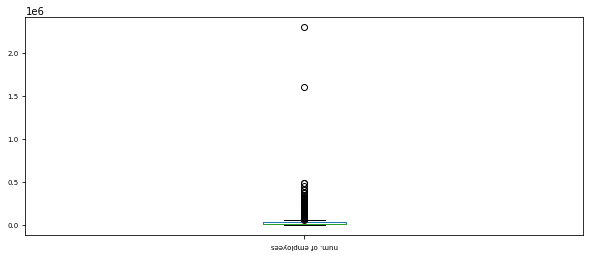

In [23]:
boxplot = fortune_list.boxplot(column=['num. of employees'],figsize = (10,4), rot = 180, fontsize= '7', grid = False)

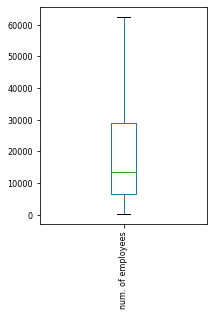

In [24]:
market_cap= fortune_list['num. of employees'].quantile([0.25, 0.5, 0.75])
a=market_cap[0.75]+(1.5*(market_cap[0.75] - market_cap[0.25]))
fortune_list_copy= fortune_list.copy()

fortune_list_copy['num. of employees'] = np.where(
    fortune_list_copy['num. of employees'] > a,
    a,
       fortune_list_copy['num. of employees']
    )
boxplot = fortune_list_copy.boxplot(column=['num. of employees'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

In [25]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)  #eksik bos olan değerleri sayıp gösterecek

#This code order the missing values. When i looking in here 

Count of missing values:


Ticker               49
Market Cap           31
profit                3
num. of employees     1
ceo_founder           0
Website               0
CEO                   0
prev_rank             0
profitable            0
ceo_woman             0
company               0
rank                  0
state                 0
city                  0
sector                0
revenue               0
rank_change           0
newcomer              0
dtype: int64

In [26]:
emptyticker = fortune_list_copy[fortune_list_copy['Ticker'].isnull()] #ticker da boş olanları göstercek 
emptyticker 

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
41,State Farm Insurance,42,-3.0,82224.7,1280.9,53586.0,Financials,Bloomington,IL,no,no,no,yes,39.0,Michael L. Tipsord,www.statefarm.com,NaN,NaN
71,New York Life Insurance,72,-5.0,51198.5,277.1,14344.0,Financials,New York,NY,no,no,no,yes,67.0,Craig DeSanto,www.newyorklife.com,NaN,-
75,Publix Super Markets,76,-7.0,48393.9,4412.2,62500.0,Food & Drug Stores,Lakeland,FL,no,no,no,yes,69.0,Randall T. Jones Sr.,www.publix.com,NaN,-
77,Liberty Mutual Insurance Group,78,-7.0,48200.0,3068.0,45000.0,Financials,Boston,MA,no,no,no,yes,71.0,David H. Long,www.libertymutual.com,NaN,NaN
79,Nationwide,80,-4.0,47376.0,1617.2,24134.0,Financials,Columbus,OH,no,no,no,yes,76.0,Kirt A. Walker,www.nationwide.com,NaN,NaN
89,TIAA,90,-11.0,40526.4,4060.7,15065.0,Financials,New York,NY,no,no,yes,yes,79.0,Thasunda Brown Duckett,www.tiaa.org,NaN,-
94,CHS,95,8.0,38448.0,554.0,9941.0,"Food, Beverages & Tobacco",Inver Grove Heights,MN,no,no,no,yes,103.0,Jay D. Debertin,www.chsinc.com,NaN,NaN
95,USAA,96,-9.0,37469.6,3300.0,37335.0,Financials,San Antonio,TX,no,no,no,yes,87.0,Wayne Peacock,www.usaa.com,NaN,-
96,Northwestern Mutual,97,-7.0,36751.2,977.8,7585.0,Financials,Milwaukee,WI,no,no,no,yes,90.0,John E. Schlifske,www.northwesternmutual.com,NaN,-
99,Massachusetts Mutual Life Insurance,100,23.0,35899.5,319.3,10052.0,Financials,Springfield,MA,no,no,no,yes,123.0,Roger W. Crandall,www.massmutual.com,NaN,-


In [27]:
fortune_list_copy.rename(columns = {'Ticker' : 'Ticker'})

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,62500.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,62500.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,62500.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,62500.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,62500.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [28]:
fortune_list_copy.Ticker.unique()

array(['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH', 'XOM', 'BRKA', 'GOOGL', 'MCK',
       'ABC', 'COST', 'CI', 'T', 'MSFT', 'CAH', 'CVX', 'HD', 'WBA', 'MPC',
       'ELV', 'KR', 'F', 'VZ', 'JPM', 'GM', 'CNC', 'META', 'CMCSA', 'PSX',
       'VLO', 'DELL', 'TGT', 'FNMA', 'UPS', 'LOW', 'BAC', 'JNJ', 'ADM',
       'FDX', 'HUM', 'WFC', nan, 'PFE', 'C', 'PEP', 'INTC', 'PG', 'GE',
       'IBM', 'MET', 'PRU', 'ACI', 'DIS', 'ET', 'LMT', 'FMCC', 'GS',
       'RTX', 'HPQ', 'BA', 'MS', 'HCA', 'ABBV', 'DOW', 'TSLA', 'ALL',
       'AIG', 'BBY', 'CHTR', 'SYY', 'MRK', 'CAT', 'CSCO', 'TJX', 'COP',
       'PGR', 'TSN', 'BMY', 'NKE', 'DE', 'AXP', 'ABT', 'SNEX', 'PAGP',
       'EPD', 'ORCL', 'TMO', 'KO', 'GD', 'NUE', 'EXC', 'NOC', 'MMM',
       'TRV', 'ARW', 'HON', 'DG', 'QCOM', 'COF', 'SNX', 'PM', 'INT',
       'PFGC', 'DAL', 'AAL', 'NFLX', 'PARA', 'USFD', 'DHR', 'JBL', 'SBUX',
       'MDLZ', 'LLY', 'HPE', 'DHI', 'MOH', 'CBRE', 'MU', 'AVGO', 'GILD',
       'PBF', 'LEN', 'UNFI', 'NRG', 'NVDA', 'OXY', 'CRM', 'DLTR

In [29]:
fortune_list_copy.Ticker.mode() #ticker attr en cok tekrar eden isimleri gosterip bunlarla doldurdum

0         A
1        AA
2       AAL
3       AAP
4      AAPL
       ... 
946    ZEUS
947      ZG
948    ZION
949      ZM
950     ZTS
Name: Ticker, Length: 951, dtype: object

In [30]:
fortune_list_copy['Ticker']=fortune_list_copy['Ticker'].fillna('AA')

In [31]:
fortune_list_copy.loc[41]#i am checking  TICKER is AA


company              State Farm Insurance
rank                                   42
rank_change                          -3.0
revenue                           82224.7
profit                             1280.9
num. of employees                 53586.0
sector                         Financials
city                          Bloomington
state                                  IL
newcomer                               no
ceo_founder                            no
ceo_woman                              no
profitable                            yes
prev_rank                            39.0
CEO                    Michael L. Tipsord
Website                 www.statefarm.com
Ticker                                 AA
Market Cap                            NaN
Name: 41, dtype: object

In [32]:
emptyprof=fortune_list_copy[fortune_list_copy['profit'].isnull()]
emptyprof# i checked the missing values from profit

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
498,Frontier Communications,499,-97.0,6411.0,NaN,15640.0,Telecommunications,Norwalk,CT,no,no,no,no,402.0,Nick Jeffery,https://www.frontier.com,FYBR,6763.1
534,Chesapeake Energy,535,0.0,5809.0,NaN,1300.0,Energy,Oklahoma City,OK,no,no,no,no,,Domenic J. Dell&#039;Osso Jr.,https://www.chk.com,CHK,11135.9
735,Garrett Motion,736,0.0,3633.0,NaN,7600.0,Motor Vehicles & Parts,Plymouth,MI,no,no,no,no,,Olivier Rabiller,https://www.garrettmotion.com,GTX,463.9


In [33]:

fortune_list_copy['prev_rank'] = pd.to_numeric(fortune_list_copy['prev_rank'], errors='coerce')

median = fortune_list_copy['prev_rank'].median()

#i  replace NaN values with the calculated median
fortune_list_copy['prev_rank'] = fortune_list_copy['prev_rank'].fillna(median)

# Calculate the mean
mean = fortune_list_copy['prev_rank'].mean()

In [34]:

fortune_list_copy['prev_rank'] = pd.to_numeric(fortune_list_copy['prev_rank'], errors='coerce')

median = fortune_list_copy['prev_rank'].median()

#i replace NaN values with the calculated median
fortune_list_copy['prev_rank'] = fortune_list_copy['prev_rank'].fillna(median)

# Calculate the mean
mean = fortune_list_copy['prev_rank'].mean()

In [35]:
median = fortune_list_copy['profit'].median()
mean = fortune_list_copy['profit'].mean()
fortune_list_copy['profit']=fortune_list_copy['profit'].fillna(median)
mean

2026.4763289869593

In [36]:
fortune_list_copy.loc[498]

company               Frontier Communications
rank                                      499
rank_change                             -97.0
revenue                                6411.0
profit                                  572.0
num. of employees                     15640.0
sector                     Telecommunications
city                                  Norwalk
state                                      CT
newcomer                                   no
ceo_founder                                no
ceo_woman                                  no
profitable                                 no
prev_rank                               402.0
CEO                              Nick Jeffery
Website              https://www.frontier.com
Ticker                                   FYBR
Market Cap                             6763.1
Name: 498, dtype: object

In [37]:
employ = fortune_list_copy[fortune_list_copy['num. of employees'].isnull()]
employ

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
865,Univision Communciations,866,0.0,2841.0,133.7,NaN,Media,New York,NY,no,no,no,yes,237.0,Wade C. Davis,https://https://corporate.televisaunivision.com,AA,NaN


In [38]:

median = fortune_list_copy['num. of employees'].median()
fortune_list_copy['num. of employees']=fortune_list_copy['num. of employees'].fillna(median)
median

13530.0

In [39]:
beklenmedik_durum = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['company'], margins=True)
beklenmedik_durum

company,1-800-Flowers.com,3M,A-Mark Precious Metals,A.O. Smith,ABM Industries,ADT,AECOM,AES,AGCO,AMC Entertainment Holdings,...,Zimmer Biomet Holdings,Zions Bancorp.,Zoetis,Zoom Video Communications,Zynga,eBay,eXp World Holdings,iHeartMedia,loanDepot,All
profit,,,,,,,,,,,,,,,,,,,,,
-6520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4539.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4439.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4202.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-2343.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76033.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89795.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
fortune_list_copy.loc[865] 

company                                     Univision Communciations
rank                                                             866
rank_change                                                      0.0
revenue                                                       2841.0
profit                                                         133.7
num. of employees                                            13530.0
sector                                                         Media
city                                                        New York
state                                                             NY
newcomer                                                          no
ceo_founder                                                       no
ceo_woman                                                         no
profitable                                                       yes
prev_rank                                                      237.0
CEO                               

In [41]:
fortune_list_copy.rename(columns = {'Market Cap' : 'Market Cap'})

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,62500.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,62500.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,62500.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,62500.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,62500.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,237.0,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,237.0,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,237.0,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,237.0,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [42]:
import pandas as pd


print("Data Types:")
print(fortune_list_copy.dtypes)

# numeric sayıya donusum yaptım market cap
fortune_list_copy['Market Cap'] = pd.to_numeric(fortune_list_copy['Market Cap'], errors='coerce')

# NaN değerleri kontrol et
nan_count_after = fortune_list_copy['Market Cap'].isnull().sum()

#  NaN değerlerin sayısını kontrol
print("NaN Count After Transformation:", nan_count_after)




Data Types:
company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees    float64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank            float64
CEO                   object
Website               object
Ticker                object
Market Cap            object
dtype: object
NaN Count After Transformation: 39


In [43]:
import pandas as pd


nan_count = fortune_list_copy['Market Cap'].isnull().sum()

if nan_count > 0:
  
    mean = fortune_list_copy['Market Cap'].mean()
    fortune_list_copy['Market Cap'].fillna(mean, inplace=True)


if fortune_list_copy['Market Cap'].dtype == 'object':
   
    fortune_list_copy['Market Cap'] = pd.to_numeric(fortune_list_copy['Market Cap'], errors='coerce')

nan_count_after = fortune_list_copy['Market Cap'].isnull().sum()

print("NaN Count After Transformation:", nan_count_after)




NaN Count After Transformation: 0


In [44]:
emptyticker = fortune_list_copy[fortune_list_copy['Market Cap'].isnull()]
emptyticker

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap


In [45]:
emptyrank = fortune_list_copy[fortune_list_copy['prev_rank'].isnull()]
emptyrank

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap


In [46]:
#prev rank numeric cevirip median degeriyle bos olan alanları doldurdum
fortune_list_copy['prev_rank'] = pd.to_numeric(fortune_list_copy['prev_rank'], errors='coerce')


median = fortune_list_copy['prev_rank'].median()

fortune_list_copy['prev_rank'] = fortune_list_copy['prev_rank'].fillna(median)



In [47]:
fortune_list_copy.loc[997] 

company                              Cowen
rank                                   998
rank_change                            0.0
revenue                             2112.8
profit                               295.6
num. of employees                   1534.0
sector                          Financials
city                              New York
state                                   NY
newcomer                                no
ceo_founder                             no
ceo_woman                               no
profitable                             yes
prev_rank                            237.0
CEO                        Jeffrey Solomon
Website              https://www.cowen.com
Ticker                                COWN
Market Cap                          1078.0
Name: 997, dtype: object

In [48]:
fortune_list_copy.loc[71]

company              New York Life Insurance
rank                                      72
rank_change                             -5.0
revenue                              51198.5
profit                                 277.1
num. of employees                    14344.0
sector                            Financials
city                                New York
state                                     NY
newcomer                                  no
ceo_founder                               no
ceo_woman                                 no
profitable                               yes
prev_rank                               67.0
CEO                            Craig DeSanto
Website                  www.newyorklife.com
Ticker                                    AA
Market Cap                      40022.939126
Name: 71, dtype: object

In [49]:
filtered = (line for line in fortune_list_copy['num. of employees'] if  line<0)
for line in filtered:
    print(fortune_list_copy)
    #i am checking is there

In [50]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


company              0
rank                 0
Ticker               0
Website              0
CEO                  0
prev_rank            0
profitable           0
ceo_woman            0
ceo_founder          0
newcomer             0
state                0
city                 0
sector               0
num. of employees    0
profit               0
revenue              0
rank_change          0
Market Cap           0
dtype: int64

In [51]:
beklenmedik_durum = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['revenue'], margins=True)
beklenmedik_durum

revenue,2107.2,2111.0,2112.8,2122.2,2124.0,2124.1,2125.5,2139.3,2140.3,2147.0,...,238228.0,257637.0,276094.0,285640.0,287597.0,292111.0,365817.0,469822.0,572754.0,All
profit,,,,,,,,,,,,,,,,,,,,,
-6520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4539.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
-4439.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4202.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-2343.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76033.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
89795.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [52]:
#  Profit column sıfırdan buyukse karlı 
fortune_list_copy['profitable'] = (fortune_list_copy['profit'] > 0).astype(int)
filtered_data = fortune_list_copy[fortune_list_copy['profit'] ==76033.0] 
unique_revenues = filtered_data['revenue'].unique()
num_unique_revenues = len(unique_revenues)

print(f"Toplam {num_unique_revenues} farklı 'revenue' değeri:")
print(unique_revenues)

#crosstable da bu degerde birden fazla değer var
#bunun nedeni analiz etmeye calısacagım



Toplam 1 farklı 'revenue' değeri:
[257637.]


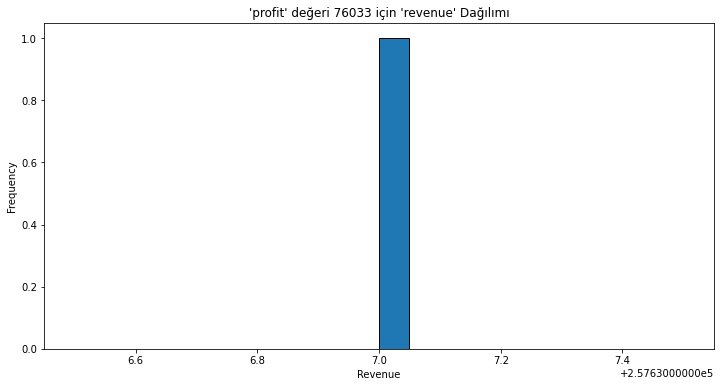

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(filtered_data['revenue'], bins=20, edgecolor='black')
plt.title("'profit' değeri 76033 için 'revenue' Dağılımı")
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()
#profit 3452 (bu değer için olan ilk basta calısıp sonra calısmadı o yuzden değiştirdim)olanlarda revenue düşük olanlar frekansi yuksek genel olarak düşük performansa veya sorunlu bir finansal duruma sahip olabileceğini düşündürdü.
#Bu durum  gelir düzeyinin beklentilerin altında olduğunu ve şirketin karlılığının düşük olduğunu işaret edebilir.Sektörel ekonomik koşullar veya sektöre özgü zorluklar da
#olabilir hedeflere ulaşmak için bilinçli olarak düşük revenue seviyelerini tercih edebilirler. Örneğin, düşük fiyatlı ürünlerle pazar payını artırmayı hedefleyebilirler

In [54]:
categoric=[a for a in fortune_list_copy.columns if fortune_list_copy[a].dtypes=='object'] 
categoric # i cannot transform all of this to numeric.

['company',
 'sector',
 'city',
 'state',
 'newcomer',
 'ceo_founder',
 'ceo_woman',
 'CEO',
 'Website',
 'Ticker']

In [55]:
fortune_list_copy['ceo_woman'] = np.where(fortune_list_copy['ceo_woman'] == 'yes', 1, 0) 

In [56]:
numeric=[a for a in fortune_list_copy.columns if fortune_list_copy[a].dtypes!='object']
numeric

['rank',
 'rank_change',
 'revenue',
 'profit',
 'num. of employees',
 'ceo_woman',
 'profitable',
 'prev_rank',
 'Market Cap']

In [57]:
corelation = fortune_list_copy.corr()
corelation

,rank,rank_change,revenue,profit,num. of employees,ceo_woman,profitable,prev_rank,Market Cap
rank,1.000000,-0.048507,-0.502607,-0.368595,-0.621448,-0.011379,-0.143109,0.311143,-0.310866
rank_change,-0.048507,1.000000,0.031845,0.019665,-0.115583,-0.015822,0.020983,0.128979,0.022338
revenue,-0.502607,0.031845,1.000000,0.651453,0.464253,0.029775,0.073526,-0.539004,0.620152
profit,-0.368595,0.019665,0.651453,1.000000,0.344699,-0.010053,0.143187,-0.389507,0.831403
num. of employees,-0.621448,-0.115583,0.464253,0.344699,1.000000,0.043662,0.087429,-0.429761,0.309286
ceo_woman,-0.011379,-0.015822,0.029775,-0.010053,0.043662,1.000000,0.016675,-0.004992,-0.028793
profitable,-0.143109,0.020983,0.073526,0.143187,0.087429,0.016675,1.000000,-0.030739,0.072501
prev_rank,0.311143,0.128979,-0.539004,-0.389507,-0.429761,-0.004992,-0.030739,1.000000,-0.322732
Market Cap,-0.310866,0.022338,0.620152,0.831403,0.309286,-0.028793,0.072501,-0.322732,1.000000


In [58]:
covariance=fortune_list_copy.cov()
covariance

,rank,rank_change,revenue,profit,num. of employees,ceo_woman,profitable,prev_rank,Market Cap
rank,8.341588e+04,-445.772375,-5.924539e+06,-6.826468e+05,-3.595443e+06,-0.907158,-13.142484,8.533296e+03,-1.152914e+07
rank_change,-4.457724e+02,1012.428027,4.135408e+04,4.012299e+03,-7.367168e+04,-0.138956,0.212298,3.897017e+02,9.126977e+04
revenue,-5.924539e+06,41354.079861,1.665724e+09,1.704930e+08,3.795596e+08,335.425409,954.182742,-2.088939e+06,3.250120e+09
profit,-6.826468e+05,4012.298942,1.704930e+08,4.111917e+07,4.427774e+07,-17.793364,291.953324,-2.371753e+05,6.845939e+08
num. of employees,-3.595443e+06,-73671.676226,3.795596e+08,4.427774e+07,4.012792e+08,241.415065,556.885185,-8.174892e+05,7.955797e+08
ceo_woman,-9.071582e-01,-0.138956,3.354254e+02,-1.779336e+01,2.414151e+02,0.076187,0.001463,-1.308448e-01,-1.020540e+03
profitable,-1.314248e+01,0.212298,9.541827e+02,2.919533e+02,5.568852e+02,0.001463,0.101105,-9.281161e-01,2.960269e+03
prev_rank,8.533296e+03,389.701660,-2.088939e+06,-2.371753e+05,-8.174892e+05,-0.130845,-0.928116,9.017045e+03,-3.935258e+06
Market Cap,-1.152914e+07,91269.773698,3.250120e+09,6.845939e+08,7.955797e+08,-1020.540414,2960.269212,-3.935258e+06,1.648917e+10


<AxesSubplot:>

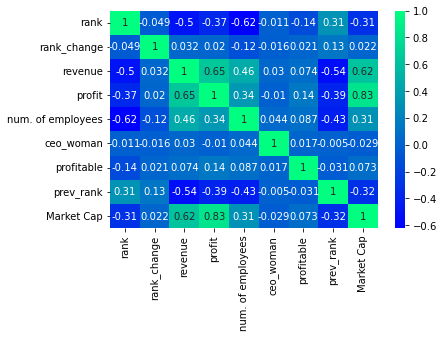

In [59]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap='winter')

In [60]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


company              0
rank                 0
Ticker               0
Website              0
CEO                  0
prev_rank            0
profitable           0
ceo_woman            0
ceo_founder          0
newcomer             0
state                0
city                 0
sector               0
num. of employees    0
profit               0
revenue              0
rank_change          0
Market Cap           0
dtype: int64

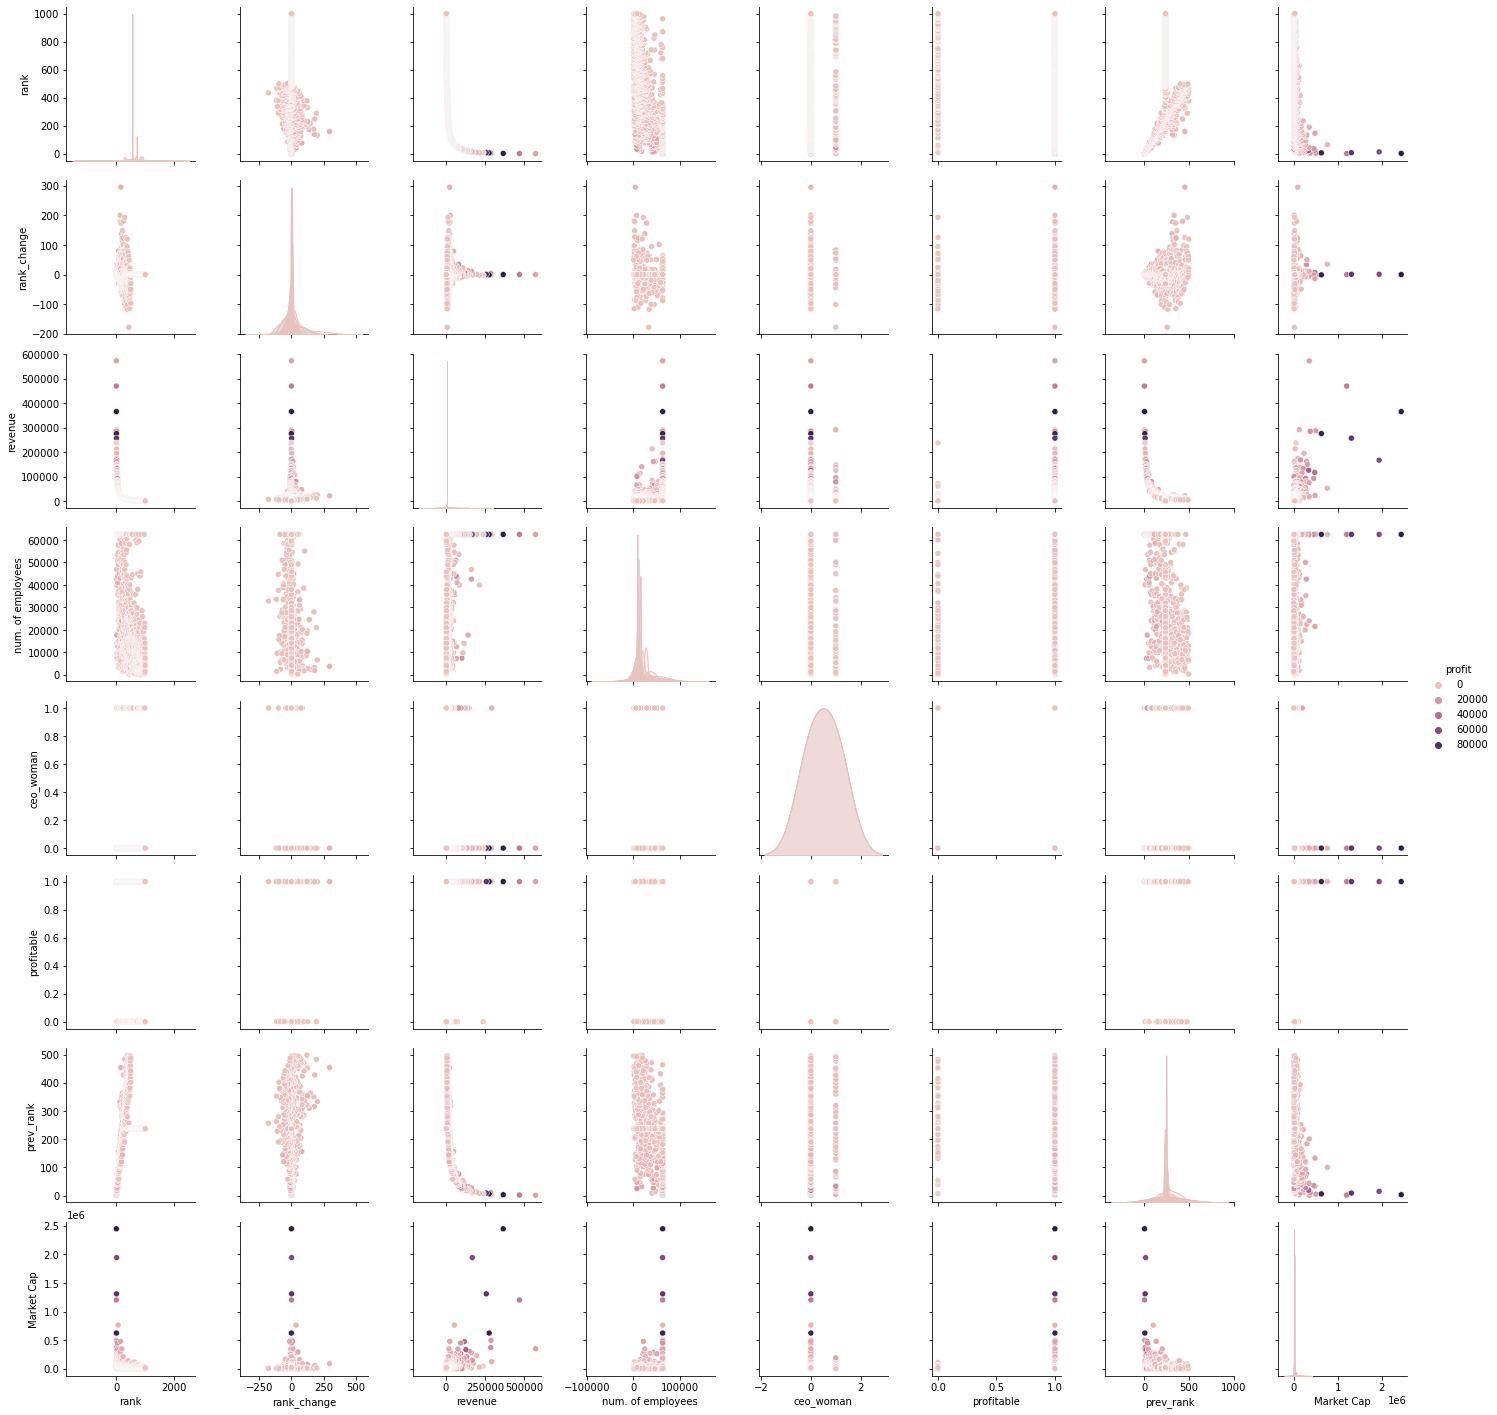

In [61]:
sns.pairplot(data=fortune_list_copy, hue='profit')

<AxesSubplot:xlabel='revenue', ylabel='rank_change'>

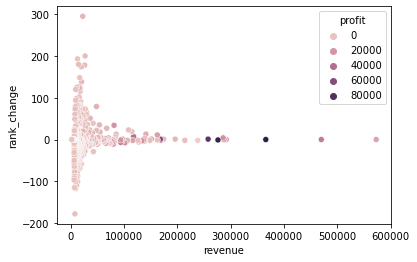

In [62]:
#fortune_list_copy = fortune_list.copy()
species = list(fortune_list_copy.groupby('profit'))
sns.scatterplot(data = fortune_list_copy, x = 'revenue', y = 'rank_change', hue='profit')

In [63]:

relation = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['rank_change'], margins=True)
relation

rank_change,-178.0,-117.0,-115.0,-110.0,-101.0,-97.0,-92.0,-88.0,-87.0,-86.0,...,127.0,138.0,148.0,174.0,178.0,180.0,193.0,200.0,295.0,All
profit,,,,,,,,,,,,,,,,,,,,,
-6520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4539.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4439.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4202.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-2343.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76033.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89795.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
import pandas as pd
import numpy as np

e = np.zeros((relation.shape[0] - 1, relation.shape[1] - 1))
summ = relation.loc['All', 'All']

for i in range(relation.shape[0] - 1):
    for j in range(relation.shape[1] - 1):
        e[i, j] = (relation.iloc[i, -1] * relation.iloc[-1, j]) / summ


real = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['rank_change']).to_numpy()

# Calculate chi-square statistic
chi_square = np.sum((real - e) ** 2 / e)
print(chi_square)


143395.16223155928


In [65]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)


Count of missing values:


company              0
rank                 0
Ticker               0
Website              0
CEO                  0
prev_rank            0
profitable           0
ceo_woman            0
ceo_founder          0
newcomer             0
state                0
city                 0
sector               0
num. of employees    0
profit               0
revenue              0
rank_change          0
Market Cap           0
dtype: int64

In [66]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
# calısana dusen profite hesaplayarak yeni attribute ekledim
fortune_list_copy['Profit_Per_Employee'] = fortune_list_copy['profit'] / fortune_list_copy['num. of employees']



In [68]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


company                0
ceo_founder            0
Market Cap             0
Ticker                 0
Website                0
CEO                    0
prev_rank              0
profitable             0
ceo_woman              0
newcomer               0
rank                   0
state                  0
city                   0
sector                 0
num. of employees      0
profit                 0
revenue                0
rank_change            0
Profit_Per_Employee    0
dtype: int64

In [69]:
#  Profit column sıfırdan buyukse karlı 
fortune_list_copy['profitable'] = (fortune_list_copy['profit'] > 0).astype(int)

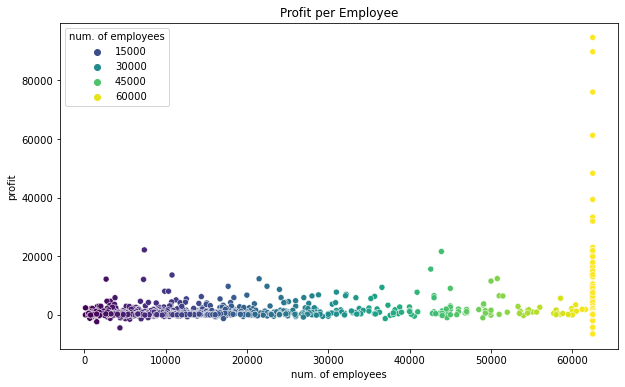

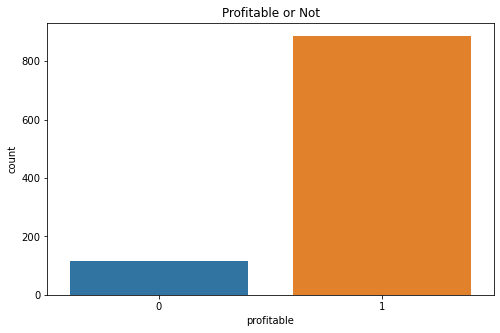

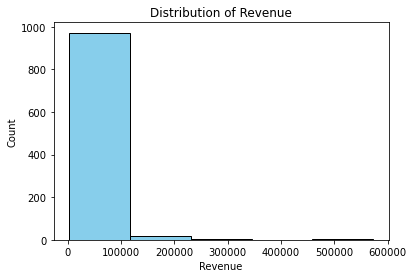

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num. of employees', y='profit', data=fortune_list_copy, hue='num. of employees', palette='viridis')
plt.title('Profit per Employee')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='profitable', data=fortune_list_copy)
plt.title('Profitable or Not')
plt.show()

plt.hist(fortune_list_copy['revenue'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()



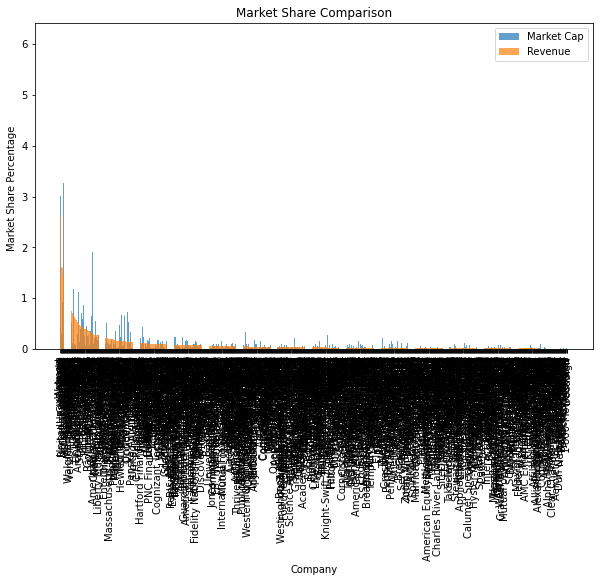

In [71]:


df = pd.DataFrame(fortune_list_copy)


total_market_cap = df['Market Cap'].sum()
total_revenue = df['revenue'].sum()

df['Marketshare_marketcap'] = (df['Market Cap'] / total_market_cap) * 100

#  Market Share Revenue göre hesaplamaya calıstım
df['Marketshare_revenue'] = (df['revenue'] / total_revenue) * 100

#  bar chart olusturdum
plt.figure(figsize=(10, 6))


plt.bar(df['company'], df['Marketshare_marketcap'], label='Market Cap', alpha=0.7)

plt.bar(df['company'], df['Marketshare_revenue'], label='Revenue', alpha=0.7)

plt.xlabel('Company')
plt.xticks(rotation=90)
plt.ylabel('Market Share Percentage ')
plt.title('Market Share Comparison')
plt.legend()
plt.show()


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree,DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image


C:\Users\merve\AppData\Local\Temp\ipykernel_7412\1986074574.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Market Cap'] = df['Market Cap'].replace('-', np.NaN).astype(np.float)


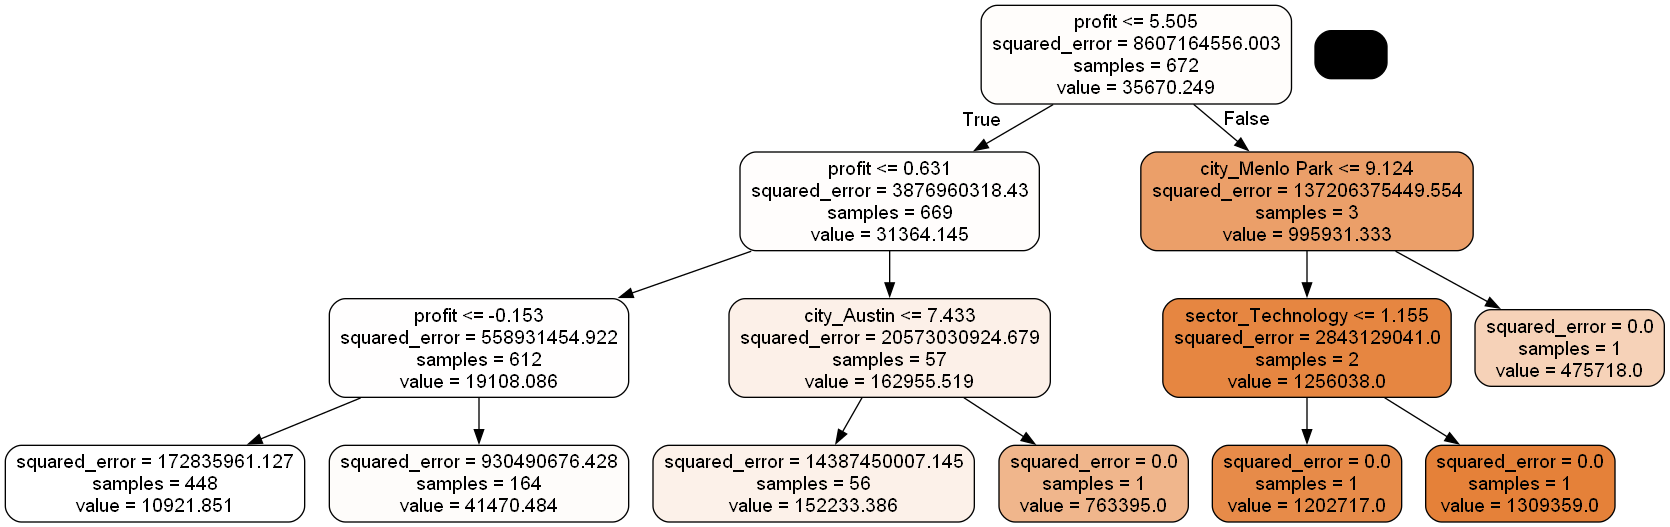

In [73]:

    df = fortune_list.copy()
    
    # kullanmadıgım kolonlaerı karmasıklık azaltmak icin drop ettim
    df = df.drop(['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)
    
    #  missing değerleri doldurdum
    df['Market Cap'] = df['Market Cap'].replace('-', np.NaN).astype(np.float)
    
    
    missing_target_rows = df[df['Market Cap'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
 
    df['profit'] = df['profit'].fillna(df['profit'].mean())
    
    # Binary encoding yaotım bazı columları
    for column in ['ceo_founder', 'ceo_woman', 'profitable']:
        df[column] = df[column].replace({'no': 0, 'yes': 1})
    
    # One-hot encodingi ile categoricleri numeric cevirdim
    for column in ['sector', 'city', 'state']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    #   X and y gore bolduk
    y = df['Market Cap']
    X = df.drop('Market Cap', axis=1)
    
    # Train-test verilerine gore bolum
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    #  X verilerini olceklıyorum  kategorik hedef değişken  sayısal değerlere dönüştüruyorum
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    X_train, X_test, y_train, y_test
    dot_data = StringIO()  
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
    dt = DecisionTreeRegressor(max_depth=3, random_state=43)
    dt.fit(X_train, y_train)

#  Sürekli hedef değişkeni ayrık sınıflara dönüştürmek için LabelEncoder kullanıyorum
   
    y_train_transformed = lab.fit_transform(y_train)

    dot_data = StringIO()  
    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['newcomer', "Not newcomer"])
  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())

In [74]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


company                  0
ceo_woman                0
Marketshare_marketcap    0
Profit_Per_Employee      0
Market Cap               0
Ticker                   0
Website                  0
CEO                      0
prev_rank                0
profitable               0
ceo_founder              0
rank                     0
newcomer                 0
state                    0
city                     0
sector                   0
num. of employees        0
profit                   0
revenue                  0
rank_change              0
Marketshare_revenue      0
dtype: int64

In [75]:
import dtreeviz.trees
import dtreeviz.trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [76]:
s=fortune_list_copy[fortune_list_copy['profit']<2148]
print("Count of profit  ", s["profit"].value_counts())

Count of profit    572.0     4
 1995.0    3
 740.1     2
 903.0     2
 396.9     2
          ..
 1353.0    1
-397.0     1
 663.0     1
 1467.0    1
-70.0      1
Name: profit, Length: 779, dtype: int64


In [77]:
s=fortune_list_copy[fortune_list_copy['rank_change']<5]
print("Count of rank change ", s["rank_change"].value_counts())

Count of rank change   0.0     544
-2.0      15
-7.0      14
 1.0      13
-6.0      12
        ... 
-33.0      1
-71.0      1
-34.0      1
-69.0      1
-97.0      1
Name: rank_change, Length: 79, dtype: int64


In [78]:
fortune_list_copy.drop('company', inplace=True, axis=1)

In [79]:
sample=fortune_list_copy.sample(20)#i can test my algorithm in this sample
sample

,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap,Profit_Per_Employee,Marketshare_marketcap,Marketshare_revenue
808,809,0.0,3145.0,1387.1,10200.0,Business Services,Chicago,IL,no,no,0,1,237.0,Christopher A. Cartwright,https://www.transunion.com,TRU,19882.6,0.135990,0.049678,0.017485
257,258,-36.0,14181.0,1488.0,31000.0,"Food, Beverages & Tobacco",Battle Creek,MI,no,no,0,1,222.0,Steven A. Cahillane,https://www.kelloggcompany.com,K,21890.2,0.048000,0.054694,0.078841
16,17,1.0,151157.0,16433.0,62500.0,Retailing,Atlanta,GA,no,no,0,1,18.0,Edward P. Decker,www.homedepot.com,HD,308152.0,0.262928,0.769938,0.840377
668,669,0.0,4232.4,171.5,4700.0,Transportation,Oak Brook,IL,no,no,0,1,237.0,David P. Yeager,https://www.hubgroup.com,HUBG,2678.5,0.036489,0.006692,0.023531
719,720,0.0,3758.8,688.5,6100.0,Retailing,Corte Madera,CA,no,no,0,1,237.0,Gary G. Friedman,https://www.rh.com,RH,7079.0,0.112869,0.017687,0.020898
202,203,-1.0,17931.0,1816.0,48500.0,Business Services,Houston,TX,no,no,0,1,202.0,James C. Fish Jr.,https://www.wm.com,WM,65802.8,0.037443,0.164413,0.099690
980,981,0.0,2188.0,143.7,5000.0,Aerospace & Defense,El Segundo,CA,no,no,1,1,237.0,Eileen P. Drake,https://www.aerojetrocketdyne.com,AJRD,3169.4,0.028740,0.007919,0.012164
810,811,0.0,3133.4,322.0,24800.0,"Hotels, Restaurants & Leisure",Carlsbad,CA,no,no,0,1,237.0,Oliver G. Brewer III,https://www.callawaygolf.com,ELY,4337.1,0.012984,0.010837,0.017421
31,32,-2.0,106005.0,6946.0,62500.0,Retailing,Minneapolis,MN,no,no,0,1,30.0,Brian C. Cornell,www.target.com,TGT,71112.0,0.111136,0.177678,0.589349
890,891,0.0,2758.3,-99.3,28545.0,Health Care,Brentwood,TN,no,no,1,0,237.0,Lucinda M. Baier,https://www.brookdale.com,BKD,1308.3,-0.003479,0.003269,0.015335


In [80]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


rank                     0
rank_change              0
Marketshare_marketcap    0
Profit_Per_Employee      0
Market Cap               0
Ticker                   0
Website                  0
CEO                      0
prev_rank                0
profitable               0
ceo_woman                0
ceo_founder              0
newcomer                 0
state                    0
city                     0
sector                   0
num. of employees        0
profit                   0
revenue                  0
Marketshare_revenue      0
dtype: int64

In [81]:
# Stratified Smpling
from sklearn.model_selection import train_test_split

# Assuming y is a DataFrame
train, xtest, ytrain, ytest = train_test_split(X, y.iloc[:, 1], test_size=1/3, random_state=85, stratify=y.iloc[:, 1])

# If y is a Series
# train, xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3, random_state=85, stratify=y)


# in here i made Stratified sampling and for education split 5 class and it found count of people in this clasess.



IndexingError: Too many indexers

In [ ]:
fortune_list_copy.keys()

In [82]:

print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


rank                     0
rank_change              0
Marketshare_marketcap    0
Profit_Per_Employee      0
Market Cap               0
Ticker                   0
Website                  0
CEO                      0
prev_rank                0
profitable               0
ceo_woman                0
ceo_founder              0
newcomer                 0
state                    0
city                     0
sector                   0
num. of employees        0
profit                   0
revenue                  0
Marketshare_revenue      0
dtype: int64

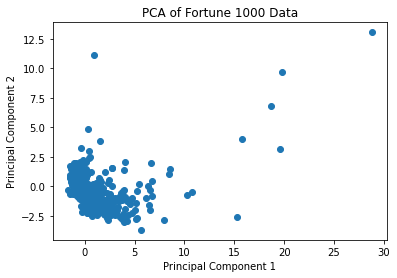

In [83]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  PCA  numerical sutunlarda
fortune_df=fortune_list_copy
# numerical columns
numerical_columns = fortune_df.select_dtypes(include=['float64', 'int64']).columns
X = fortune_df[numerical_columns]

#  the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA instance with the desired number of components
#I chose this one because it has low variance but gives us the high ratio.
n_components = 5 
pca = PCA(n_components=n_components)

# PCA model and i transform the data
X_pca = pca.fit_transform(X_std)

#educed data
columns = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)
# Azaltılmış özellikleri  sayısal olmayan sütunlarla birleştirdim
result_df = pd.concat([fortune_df[['revenue', 'city']], X_pca_df], axis=1)

plt.scatter(result_df['PC1'], result_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fortune 1000 Data')
plt.show()

Explained Variance Ratio for Each Component:
[0.48331404 0.14211088 0.10386778 0.0915158  0.07493354]


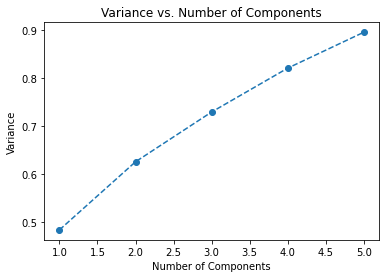

In [84]:
import numpy as np
pca.fit(X_std)

# the variance for each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(explained_variance)
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Variance vs. Number of Components')
plt.show()

In [85]:
fortune_list_copy["profitable"].value_counts()

1    886
0    114
Name: profitable, dtype: int64

In [86]:
ent = pd.crosstab(fortune_list_copy['sector'], fortune_list_copy['profitable'], margins=True)
ent ent = pd.crosstab(fortune_list_copy['sector'], fortune_list_copy['profitable'], margins=True)
ent   #sektorlere gore kac tane sirketin o alanda karlı olup olmadıgını gostetiyor 

profitable,0,1,All
sector,,,
Aerospace & Defense,2,15,17
Apparel,1,15,16
Business Services,8,44,52
Chemicals,0,29,29
Energy,22,78,100
Engineering & Construction,1,31,32
Financials,9,157,166
Food & Drug Stores,1,8,9
"Food, Beverages & Tobacco",1,33,34


In [87]:
print(df.columns)

Index(['revenue', 'profit', 'num. of employees', 'ceo_founder', 'ceo_woman',
       'profitable', 'Market Cap', 'sector_Aerospace & Defense',
       'sector_Apparel', 'sector_Business Services',
       ...
       'state_PA', 'state_PR', 'state_RI', 'state_SC', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_WA', 'state_WI'],
      dtype='object', length=460)


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X = df[['revenue', 'ceo_woman', 'ceo_founder']]
y=df[['ceo_founder', 'ceo_woman']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_model = DecisionTreeClassifier()

#  cross validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

#
best_params_dt = grid_search_dt.best_params_
print(best_params_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X = df[['revenue', 'ceo_founder', 'ceo_woman']]
y=df['ceo_founder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y.values.ravel()
# hyperparameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}


lr_model = LogisticRegression()


grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

In [1]:
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

X = df[['revenue', 'ceo_founder', 'ceo_woman']]


silhouette_scorer = make_scorer(silhouette_score)

#  hyperparameter grid for K-Means Clustering
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300]
}

kmeans_model = KMeans()


grid_search_kmeans = GridSearchCV(kmeans_model, param_grid_kmeans, cv=5, scoring=silhouette_scorer)
grid_search_kmeans.fit(X)  # Note: No y since K-Means is unsupervised

# best parameters for K-Means clustering
best_params_kmeans = grid_search_kmeans.best_params_
print(best_params_kmeans)


NameError: name 'df' is not defined

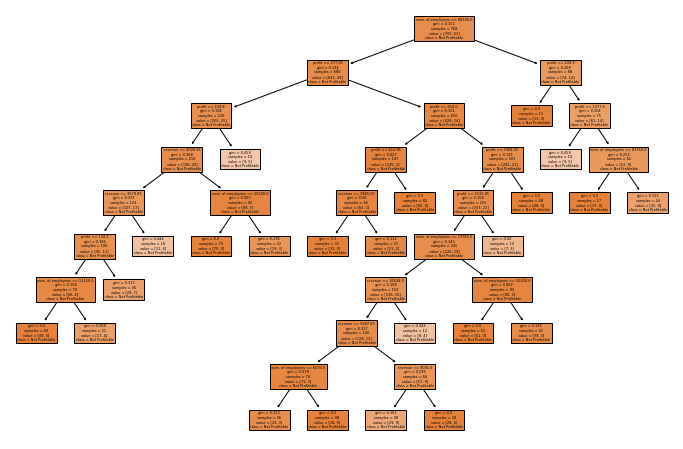

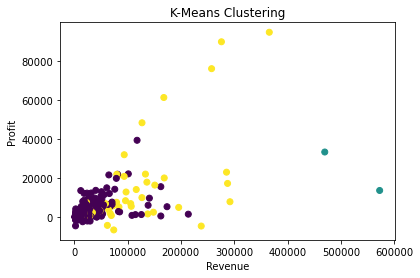

Decision Tree Accuracy: 0.9326424870466321
Logistic Regression Accuracy: 0.9326424870466321
K-Means Accuracy : 0.8522953950200349


In [109]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split

#X = df[['revenue', 'profit', 'num. of employees']]
#y = df['profitable']  # Assuming 'Profitable'  

X = df[['revenue', 'profit', 'num. of employees']]
y = df['ceo_woman'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree
# the best_params_dt from GridSearchCV
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=50, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)


plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Profitable', 'Profitable'])
plt.show()

#  Logistic Regression
# the best_params_lr from GridSearchCV
lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

#K-Means Clustering
#  best_params_kmeans from GridSearchCV
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=100)
kmeans_model.fit(X)
kmeans_labels = kmeans_model.labels_
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

plt.scatter(X['revenue'], X['profit'], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()


print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("K-Means Accuracy :", kmeans_silhouette_score)


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

X = df[[ 'profit', 'num. of employees']]
y = df['ceo_woman'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Decision Tree model with azalmıs max_depth guncelledim
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=20, min_samples_leaf=10)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the training and test sets
dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

# Calculate accuracy on training and test sets
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)

# Cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)

# Print results
print(f"Training Accuracy: {dt_train_accuracy:.3f}")
print(f"Testing Accuracy: {dt_test_accuracy:.3f}")
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)

#train setinin dogrulugunun daha yuksek cıkması overfitting ihtimalinin düşük olduğunu gösteriyor

Training Accuracy: 0.918
Testing Accuracy: 0.933
Cross-validation Scores: [0.91752577 0.92708333 0.92708333 0.92708333 0.92708333 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667]
Mean CV Score: 0.9209192439862542


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

X = df[[ 'profit', 'num. of employees']]
y = df['ceo_woman'] 

#  train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=20, min_samples_leaf=10)

# train the model
dt_model.fit(X_train, y_train)

# 
dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

#  accuracy on training and test sets
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)


cv_scores = cross_val_score(dt_model, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)

# Print results
print(f"Training Accuracy: {dt_train_accuracy:.3f}")
print(f"Testing Accuracy: {dt_test_accuracy:.3f}")
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)


Training Accuracy: 0.918
Testing Accuracy: 0.933
Cross-validation Scores: [0.91752577 0.92708333 0.92708333 0.92708333 0.92708333 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667]
Mean CV Score: 0.9209192439862542


In [164]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


dtree = DecisionTreeClassifier()


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)


best_dtree = grid_search.best_estimator_

predictions = best_dtree.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy after tuning:", accuracy)


#  Implement your selected algorithm.(Logistic Regression)

In [155]:
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pip install imbalanced-learn


classifier = LogisticRegression(solver='sag',random_state=0)

classifier.fit(X_train, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge


LogisticRegression(random_state=0, solver='sag')

In [156]:
predictionLogisticR= classifier.predict( X_test)
accuracyLogisticRegresssion = accuracy_score(y_test, predictionLogisticR)
accuracyLogisticRegresssion 

0.9182389937106918

In [165]:
classifier = LogisticRegression(solver='newton-cg',random_state=3)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.


LogisticRegression(random_state=3, solver='newton-cg')

In [166]:
predictionsLogistic = classifier.predict(X_test)
accuracyLR = accuracy_score(y_test, predictionsLogistic)
accuracyLR

0.9150943396226415

In [172]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Eğitim setiyle  modeli eğittim
classifier = LogisticRegression(solver='lbfgs', random_state=3)
classifier.fit(X_resampled, y_resampled)

# Test seti üzerinde tahmin yaptim
pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")
#classifier = LogisticRegression(solver='lbfgs',random_state=3)
#classifier.fit(X_train, y_train)


Testing Accuracy: 44.65%


In [173]:
predictionsLR = classifier.predict(X_test)
accuracyLR = accuracy_score(y_test, predictionsLR)
accuracyLR

0.44654088050314467

In [174]:
print('Acc:{:.3f}'.format(classifier.score( X_test, y_test)))

Acc:0.447


In [175]:
classifier.score(X_test, y_test)


0.44654088050314467

In [198]:
from sklearn.metrics import classification_report
classification_report(y_test, predictionsLR)

'              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58       292\n           1       0.10      0.73      0.18        26\n\n    accuracy                           0.45       318\n   macro avg       0.52      0.58      0.38       318\nweighted avg       0.88      0.45      0.55       318\n'

In [120]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [201]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


smote = SMOTE(random_state=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

svm_classifier = SVC(kernel='rbf', random_state=3)
svm_classifier.fit(X_resampled, y_resampled)

# test seti üzerinde tahmin yap
svm_pred = svm_classifier.predict(X_test)

# doğruluk oranı
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Testing Accuracy: {svm_accuracy * 100:.2f}%")



SVM Testing Accuracy: 88.68%


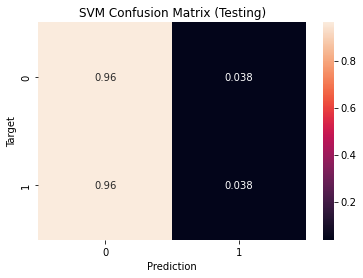

In [200]:

svm_cf = confusion_matrix(y_test, svm_pred, normalize='true')
plt.figure()
sns.heatmap(svm_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('SVM Confusion Matrix (Testing)')
plt.show()


# a) Implement your selected algorithms(Decision Tree)

In [179]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [180]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

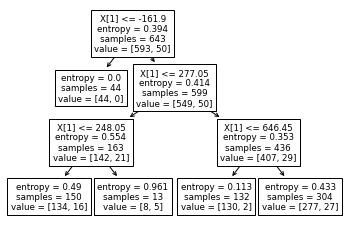

In [181]:
from sklearn import tree
tree.plot_tree(model);

In [182]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
findaccuracy = accuracy_score(y_test, predictions)
findaccuracy

0.9182389937106918

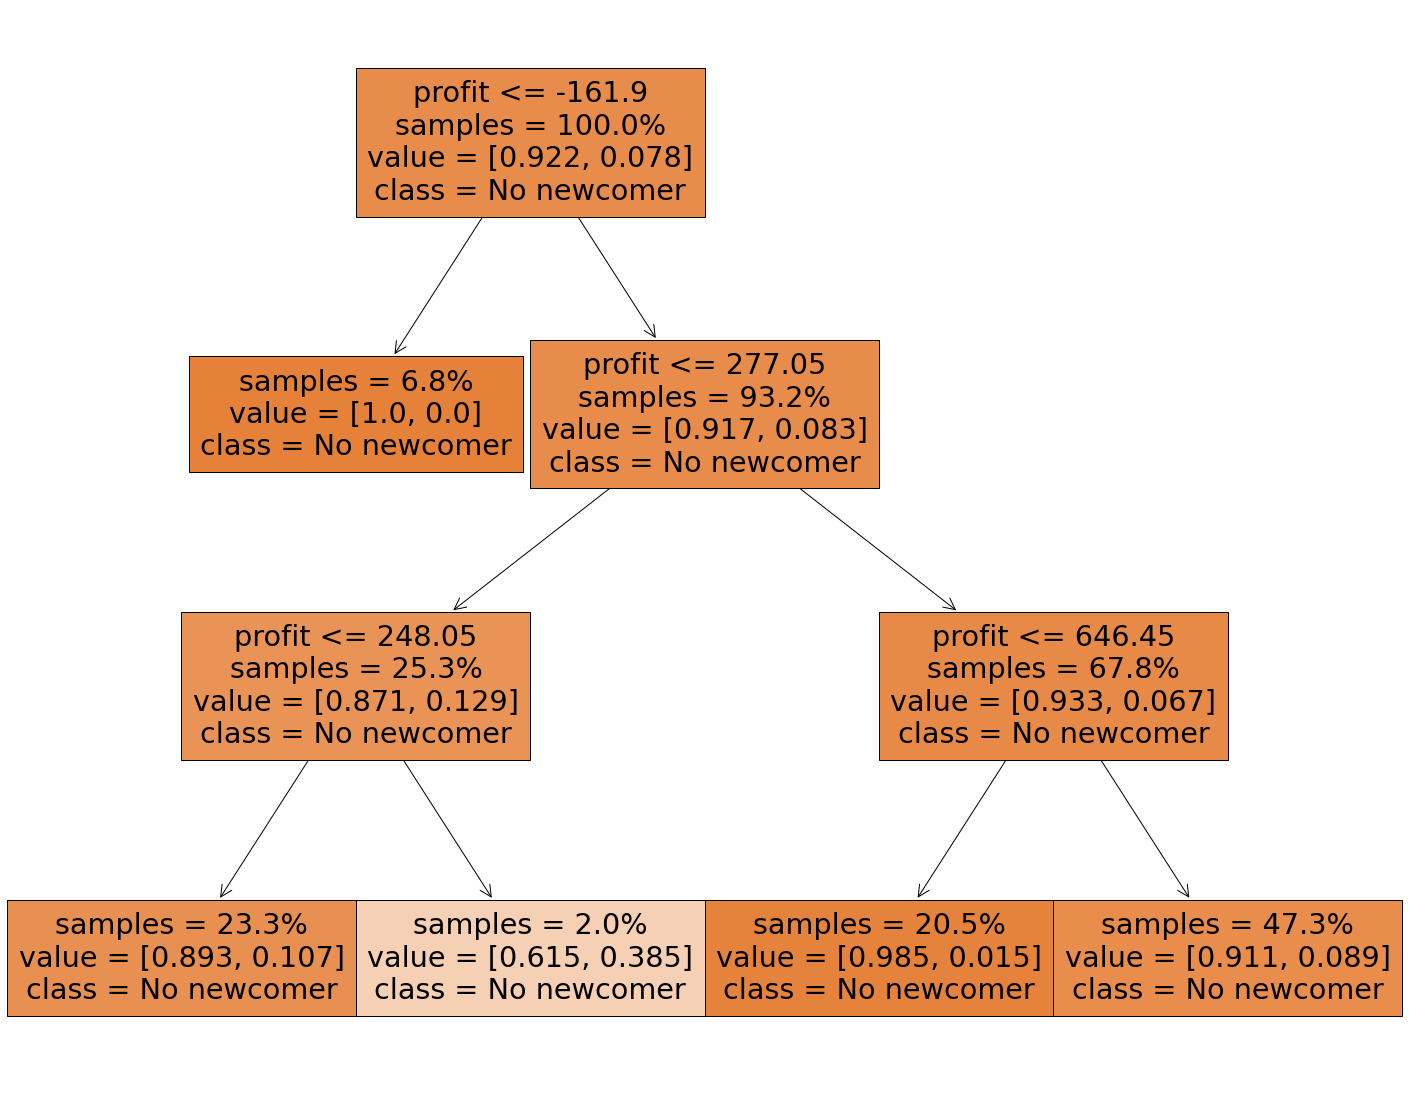

In [183]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=['No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test_img.png')

# c)Compare the algorithms with tuned hyperparameter based on the selected evaluation technique, numerically and visually.

In [184]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc


0.9150943396226415

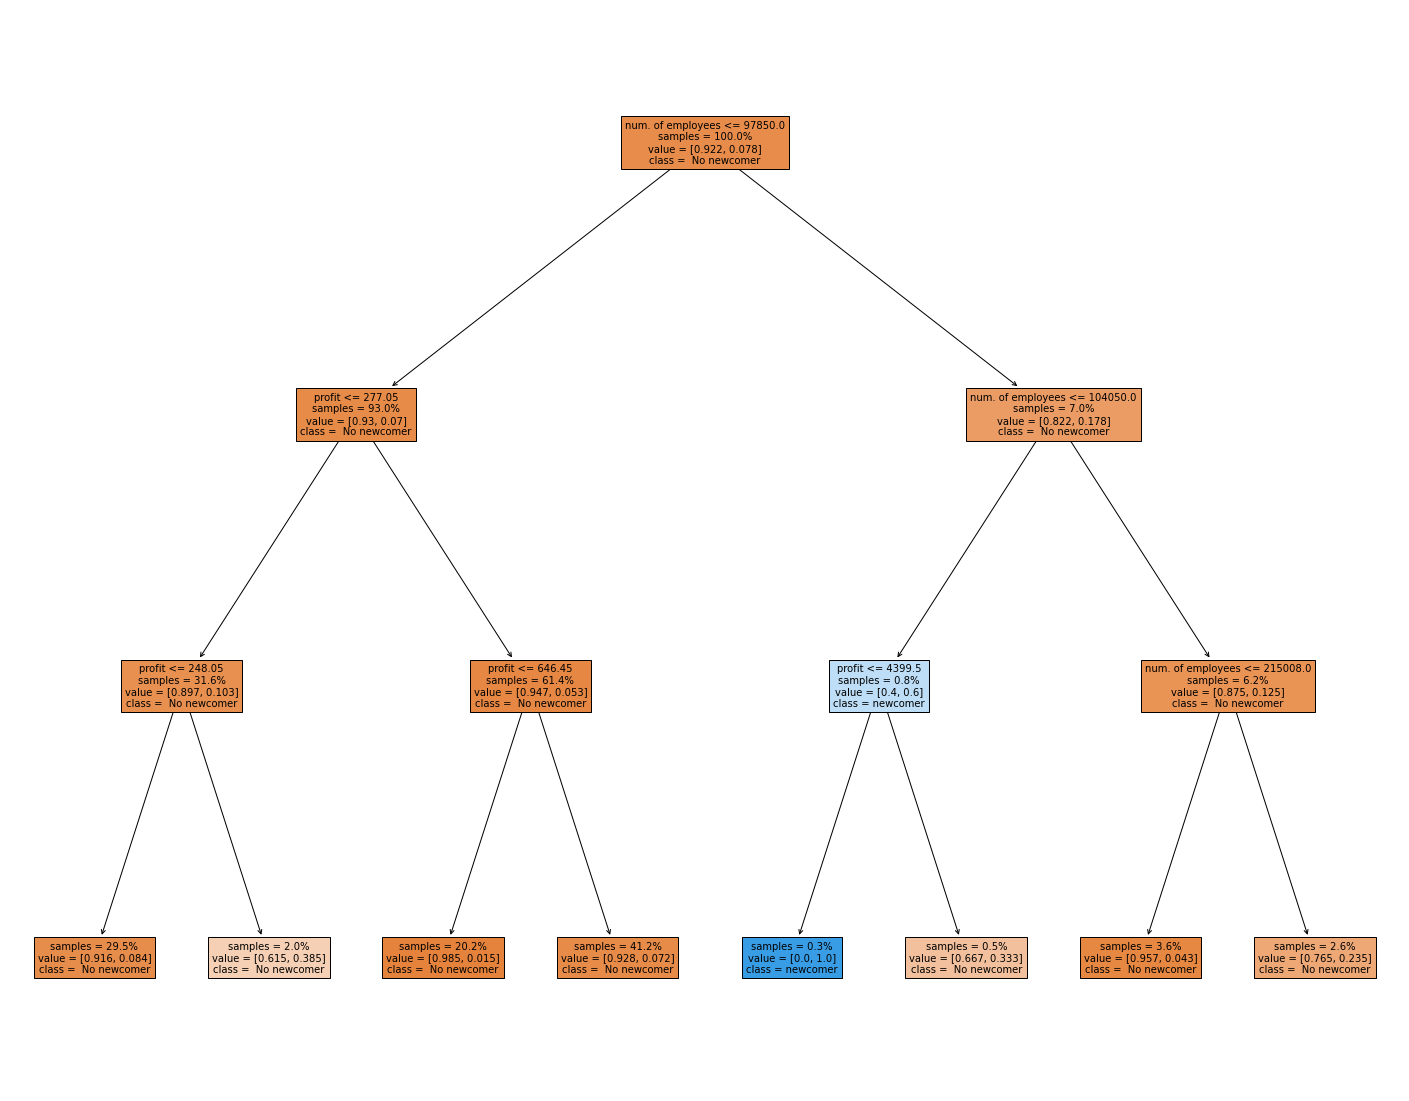

In [185]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test2.png')

In [186]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.9150943396226415

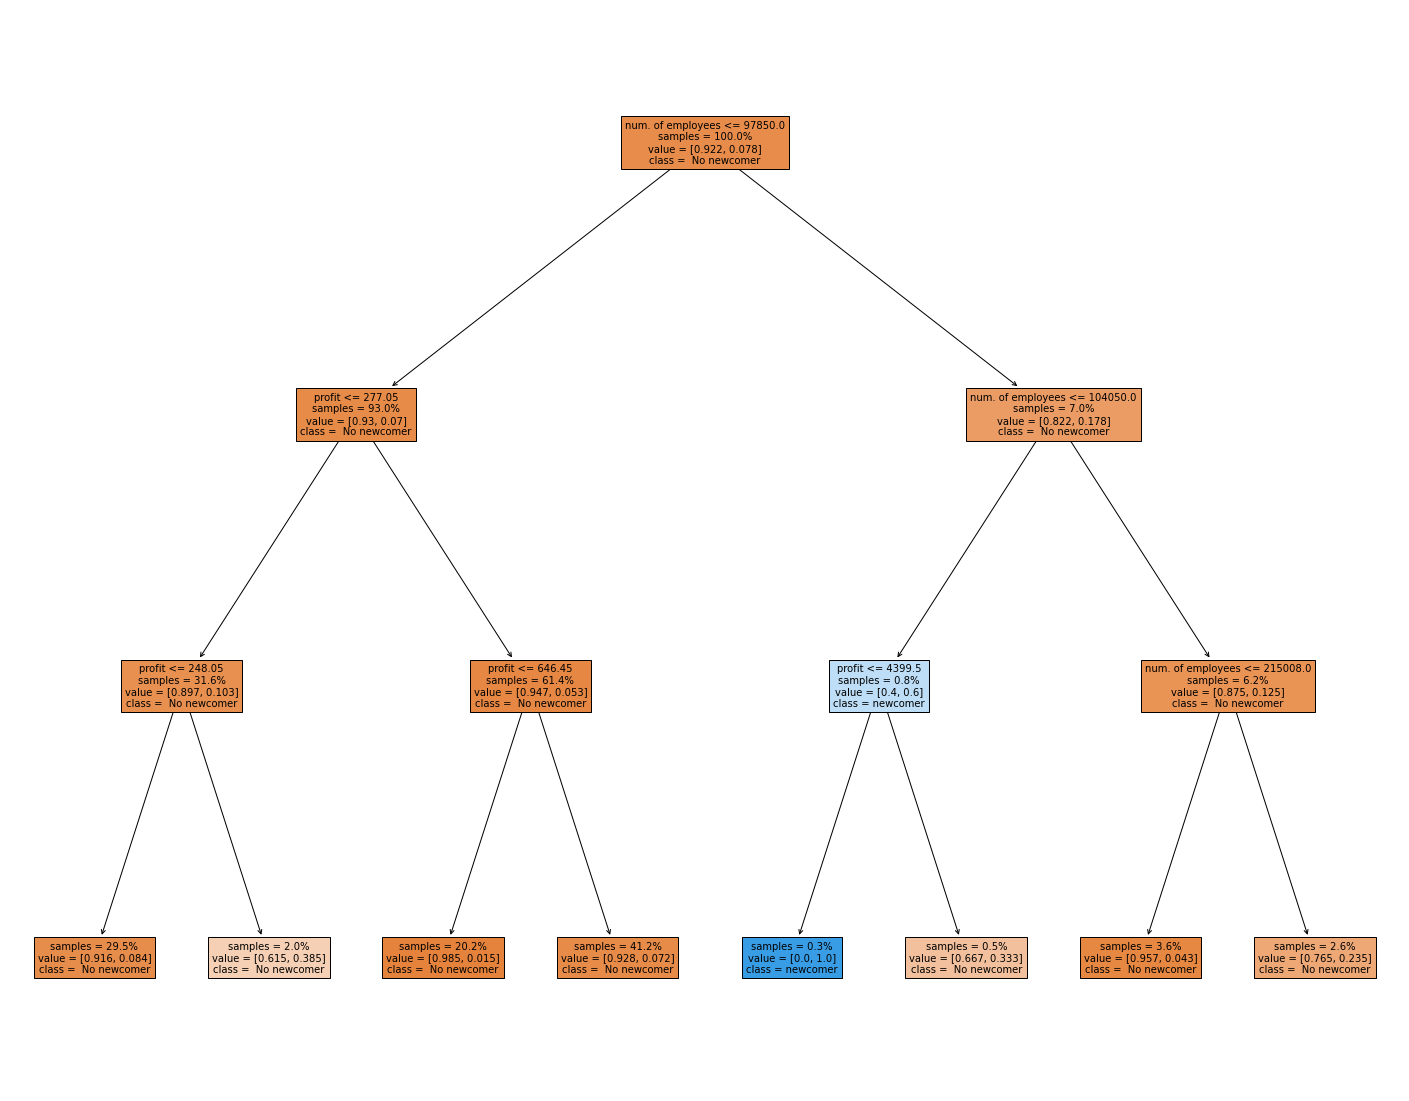

In [187]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test3.png')

In [188]:
dtree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.8616352201257862

In [189]:
dtree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.8836477987421384

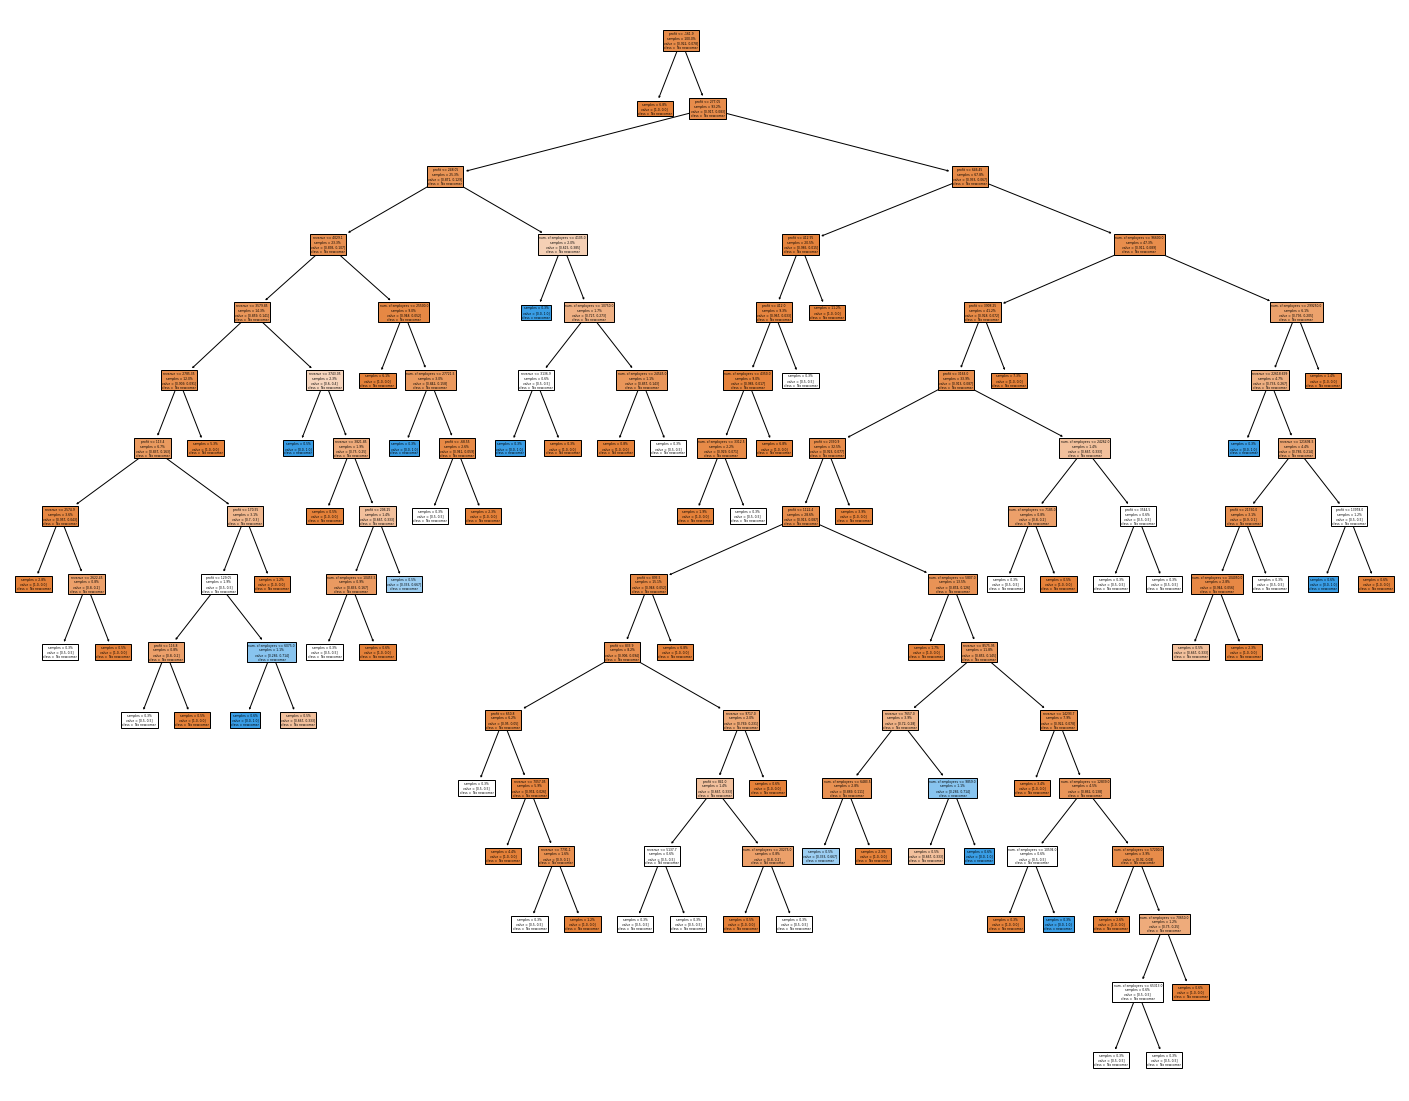

In [190]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test4.png')

In [191]:
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.8805031446540881

In [192]:
#tuned
classifier.fit(X_train, y_train)

predicitions = classifier.predict(X_test)
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       292
           1       0.00      0.00      0.00        26

    accuracy                           0.92       318
   macro avg       0.46      0.50      0.48       318
weighted avg       0.84      0.92      0.88       318



In [193]:
dtree.fit(X_train, y_train)

predicitions = dtree.predict(X_test)
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       292
           1       0.07      0.04      0.05        26

    accuracy                           0.88       318
   macro avg       0.49      0.50      0.49       318
weighted avg       0.85      0.88      0.86       318



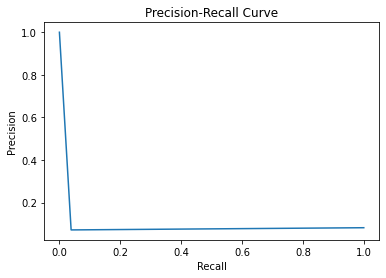

In [194]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicitions )


fig, ax = plt.subplots() 
ax.plot(recall, precision) 


ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

88.0503144654088


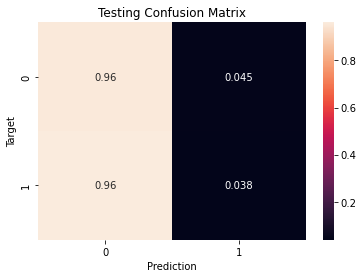

In [195]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pred= dtree.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

91.50943396226415


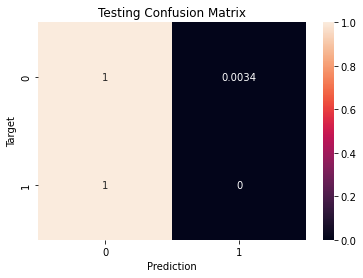

In [196]:
pred= classifier.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionLogisticR,normalize='true')

array([[1., 0.],
       [1., 0.]])

In [143]:
metrics.confusion_matrix(y_test, predictions)

array([[292,   0],
       [ 26,   0]], dtype=int64)

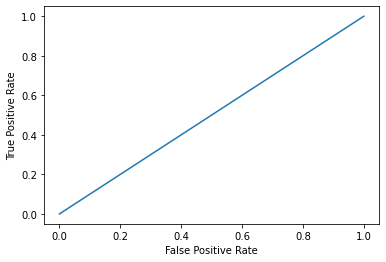

In [144]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Further Performence 
Can you propose any other improvement techniques

# Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [1,2,3,4,5,6,7,8,9]:
        for min_samples_leaf in [4,5, 10, 20, 30,40,50,60,70]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                print(best_params)
                best_acc = acc
best_acc

criterion: gini, max_depth: 1, min_samples_leaf: 4


0.9182389937106918

# Logistic Regression

In [146]:

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.918347 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.913105 (0.020525) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912063 (0.024438) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915188 (0.016067) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.913105 (0.020525) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912063 (0.024438) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915188 (0.016067) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.913105 (0.020525) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912063 (0.024438) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915188 (0.016067) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.913105 (0.020525) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912063 (0.024438) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.918347 (0.014829) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.914147 (0.019322) wit

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#  pipeline  scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression()) 
])

#  the hyperparameter grid to search
param_grid = {
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'classifier__penalty': ['l2'],
    'classifier__C': [100, 10, 1.0, 0.1, 0.01]
}

#  5 -fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test set:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)


Accuracy on the test set: 0.9150943396226415
Best hyperparameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
